<a href="https://colab.research.google.com/github/yashwanthjilla7/INFO-5731/blob/main/Jilla_Yashwanth_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [2]:
import pandas as pd
import re
from collections import defaultdict

class NgramAnalyzer:
    def __init__(self, dataset):
        self.dataset = dataset
        self.ngram_counts = defaultdict(int)
        self.bigram_probabilities = {}
        self.noun_phrase_frequencies = defaultdict(int)
        self.max_frequency = 0
        self.relative_probabilities = {}

    def preprocess_text(self, text):
        """
        Preprocesses text data by converting to lowercase and removing non-alphanumeric characters.
        """
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        return text

    def tokenize(self, text):
        """
        Tokenizes text into words.
        """
        return text.split()

    def generate_ngrams(self, tokens, n):
        """
        Generates n-grams from a list of tokens.
        """
        ngrams = []
        for i in range(len(tokens) - n + 1):
            ngram = ' '.join(tokens[i:i+n])
            ngrams.append(ngram)
        return ngrams

    def count_ngrams(self, n):
        """
        Counts the frequency of all the N-grams (N = n).
        """
        for text in self.dataset:
            text = self.preprocess_text(text)
            tokens = self.tokenize(text)
            ngrams = self.generate_ngrams(tokens, n)
            for ngram in ngrams:
                self.ngram_counts[ngram] += 1

    def calculate_bigram_probabilities(self):
        """
        Calculates the probabilities for all the bigrams in the dataset.
        """
        bigram_counts = defaultdict(int)
        unigram_counts = defaultdict(int)

        for text in self.dataset:
            text = self.preprocess_text(text)
            tokens = self.tokenize(text)
            for i in range(len(tokens) - 1):
                bigram = (tokens[i], tokens[i+1])
                bigram_counts[bigram] += 1
                unigram_counts[tokens[i]] += 1

        for bigram, count in bigram_counts.items():
            word1, word2 = bigram
            probability = count / unigram_counts[word1]
            self.bigram_probabilities[bigram] = probability

    def extract_noun_phrases(self):
        """
        Extracts all the noun phrases from the text data.
        """
        for description in self.dataset:
            description = self.preprocess_text(description)
            tokens = self.tokenize(description)
            for i in range(len(tokens) - 1):
                noun_phrase = ' '.join(tokens[i:i+2])  # considering only bigrams for simplicity
                self.noun_phrase_frequencies[noun_phrase] += 1
                if self.noun_phrase_frequencies[noun_phrase] > self.max_frequency:
                    self.max_frequency = self.noun_phrase_frequencies[noun_phrase]

    def calculate_relative_probabilities(self):
        """
        Calculates the relative probabilities of each review in terms of other reviews based on noun phrases.
        """
        for i, description in enumerate(self.dataset):
            description = self.preprocess_text(description)
            tokens = self.tokenize(description)
            probabilities = []
            for j in range(len(tokens) - 1):
                noun_phrase = ' '.join(tokens[j:j+2])  # considering only bigrams for simplicity
                probability = self.noun_phrase_frequencies[noun_phrase] / self.max_frequency
                probabilities.append(probability)
            self.relative_probabilities[f'Review {i+1}'] = probabilities

    def run_analysis(self, n):
        """
        Runs the complete analysis.
        """
        self.count_ngrams(n)
        self.calculate_bigram_probabilities()
        self.extract_noun_phrases()
        self.calculate_relative_probabilities()

# Read data from the file
df = pd.read_csv('densho_cleaned.csv')

# Drop null values
df.dropna(inplace=True)

# Extract cleaned descriptions
dataset = df['Cleaned_Description'].tolist()

# Create an instance of the NgramAnalyzer class
analyzer = NgramAnalyzer(dataset)
analyzer.run_analysis(3)

# Print the results
print("N-gram Counts:")
count = 0
for ngram, count in analyzer.ngram_counts.items():
    print(ngram, "-", count)
    count += 1
    if count >= 10:  # Print only the first 10 lines
        break

print("\nBigram Probabilities:")
count = 0
for bigram, probability in analyzer.bigram_probabilities.items():
    print(bigram, "-", probability)
    count += 1
    if count >= 10:  # Print only the first 10 lines
        break

print("\nRelative Probabilities of Noun Phrases:")
print("\t" + "\t".join(analyzer.noun_phrase_frequencies.keys()))
count = 0
for review, probabilities in analyzer.relative_probabilities.items():
    print(review + "\t" + "\t".join(map(str, probabilities)))
    count += 1
    if count >= 10:  # Print only the first 10 lines
        break

# Save the rest of the lines to a file
with open('remaining_analysis_results.txt', 'w') as file:
    file.write("N-gram Counts:\n")
    for ngram, count in list(analyzer.ngram_counts.items())[10:]:
        file.write(f"{ngram} - {count}\n")

    file.write("\nBigram Probabilities:\n")
    for bigram, probability in list(analyzer.bigram_probabilities.items())[10:]:
        file.write(f"{bigram} - {probability}\n")

    file.write("\nRelative Probabilities of Noun Phrases:\n")
    file.write("\t" + "\t".join(analyzer.noun_phrase_frequencies.keys()) + "\n")
    for review, probabilities in list(analyzer.relative_probabilities.items())[10:]:
        file.write(f"{review}\t" + "\t".join(map(str, probabilities)) + "\n")

print("First 10 lines printed. Remaining lines saved to 'remaining_analysis_results.txt' file.")

N-gram Counts:
nisei male born - 359

Bigram Probabilities:
('nisei', 'male') - 0.5409356725146199
('male', 'born') - 0.9382978723404255
('born', 'septemb') - 0.05341614906832298
('septemb', 'seattl') - 0.046511627906976744
('seattl', 'washington') - 0.4414715719063545
('washington', 'spent') - 0.058823529411764705
('spent', 'prewar') - 0.28
('prewar', 'childhood') - 0.6666666666666666
('childhood', 'seattl') - 0.10869565217391304
('seattl', 'nihonmachi') - 0.023411371237458192

Relative Probabilities of Noun Phrases:
	nisei male	male born	born septemb	septemb seattl	seattl washington	washington spent	spent prewar	prewar childhood	childhood seattl	seattl nihonmachi	nihonmachi incarcer	incarcer puyallup	puyallup assembl	assembl center	center washington	washington minidoka	minidoka concentr	concentr camp	camp idaho	idaho refus	refus particip	particip draft	draft imprison	imprison mcneil	mcneil island	island penitentiari	penitentiari washington	washington draft	draft resist	resist resettl

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [3]:
# Write your code here
import math

class TFIDF:
    def __init__(self, documents):
        self.documents = documents
        self.term_frequency = []
        self.inverse_document_frequency = {}
        self.tf_idf_weights = []

    def preprocess_text(self, text):
        """
        Preprocesses text data by converting to lowercase and removing non-alphanumeric characters.
        """
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        return text

    def tokenize(self, text):
        """
        Tokenizes text into terms.
        """
        return text.split()

    def calculate_term_frequency(self):
        """
        Calculates term frequency (TF) for each term in each document.
        """
        self.term_frequency = []
        for document in self.documents:
            document = self.preprocess_text(document)
            tokens = self.tokenize(document)
            term_freq = defaultdict(int)
            for token in tokens:
                term_freq[token] += 1
            self.term_frequency.append(term_freq)

    def calculate_inverse_document_frequency(self):
        """
        Calculates inverse document frequency (IDF) for each term.
        """
        self.inverse_document_frequency = {}
        total_documents = len(self.documents)
        for term_freq in self.term_frequency:
            for term in term_freq.keys():
                if term not in self.inverse_document_frequency:
                    document_count = sum(1 for term_freq in self.term_frequency if term in term_freq)
                    self.inverse_document_frequency[term] = math.log(total_documents / (1 + document_count))

    def calculate_tf_idf_weights(self):
        """
        Calculates TF-IDF weights for each term in each document.
        """
        self.tf_idf_weights = []
        for term_freq in self.term_frequency:
            tf_idf_weights = {}
            for term, freq in term_freq.items():
                tf_idf_weights[term] = freq * self.inverse_document_frequency.get(term, 0)
            self.tf_idf_weights.append(tf_idf_weights)

    def cosine_similarity(self, query_vector, document_vector):
        """
        Calculates cosine similarity between query and document vectors.
        """
        dot_product = sum(query_vector.get(term, 0) * document_vector.get(term, 0) for term in set(query_vector) & set(document_vector))
        query_norm = math.sqrt(sum(value ** 2 for value in query_vector.values()))
        document_norm = math.sqrt(sum(value ** 2 for value in document_vector.values()))
        return dot_product / (query_norm * document_norm) if query_norm != 0 and document_norm != 0 else 0

    def rank_documents(self, query):
        """
        Ranks the documents based on cosine similarity with the query.
        """
        query = self.preprocess_text(query)
        query_vector = defaultdict(int)
        tokens = self.tokenize(query)
        for token in tokens:
            query_vector[token] += 1
        query_tf_idf_weights = {}
        for term, freq in query_vector.items():
            query_tf_idf_weights[term] = freq * self.inverse_document_frequency.get(term, 0)

        document_ranking = []
        for document_weights in self.tf_idf_weights:
            similarity = self.cosine_similarity(query_tf_idf_weights, document_weights)
            document_ranking.append(similarity)

        sorted_documents = sorted(enumerate(document_ranking), key=lambda x: x[1], reverse=True)
        return sorted_documents


# Read data from the file
df = pd.read_csv('densho_cleaned.csv')

# Drop null values from 'Cleaned_Description' column
df.dropna(subset=['Cleaned_Description'], inplace=True)

# Extract 'Cleaned_Description' column
documents = df['Cleaned_Description'].tolist()

# Create an instance of the TFIDF class
tfidf = TFIDF(documents)

# Step 1: Calculate term frequency (TF) for each term in each document
tfidf.calculate_term_frequency()

# Step 2: Calculate inverse document frequency (IDF) for each term
tfidf.calculate_inverse_document_frequency()

# Step 3: Calculate TF-IDF weights for each term in each document
tfidf.calculate_tf_idf_weights()

# Step 4: Design a query
query = "world"

# Step 5-7: Rank the documents with respect to the query using cosine similarity
ranked_documents = tfidf.rank_documents(query)

# Print only the first 5 ranked documents
print("Ranked Documents:")
for idx, similarity in ranked_documents[:5]:
    print(f"Document {idx + 1}: Similarity = {similarity:.4f}")

# Save the rest of the ranked documents to a file
with open('ranked_documents.txt', 'w') as file:
    file.write("Ranked Documents:\n")
    for idx, similarity in ranked_documents[5:]:
        file.write(f"Document {idx + 1}: Similarity = {similarity:.4f}\n")

print("First 5 ranked documents printed. Remaining documents saved to 'ranked_documents.txt'.")

Ranked Documents:
Document 440: Similarity = 0.1028
Document 309: Similarity = 0.0837
Document 74: Similarity = 0.0837
Document 437: Similarity = 0.0827
Document 755: Similarity = 0.0810
First 5 ranked documents printed. Remaining documents saved to 'ranked_documents.txt'.


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

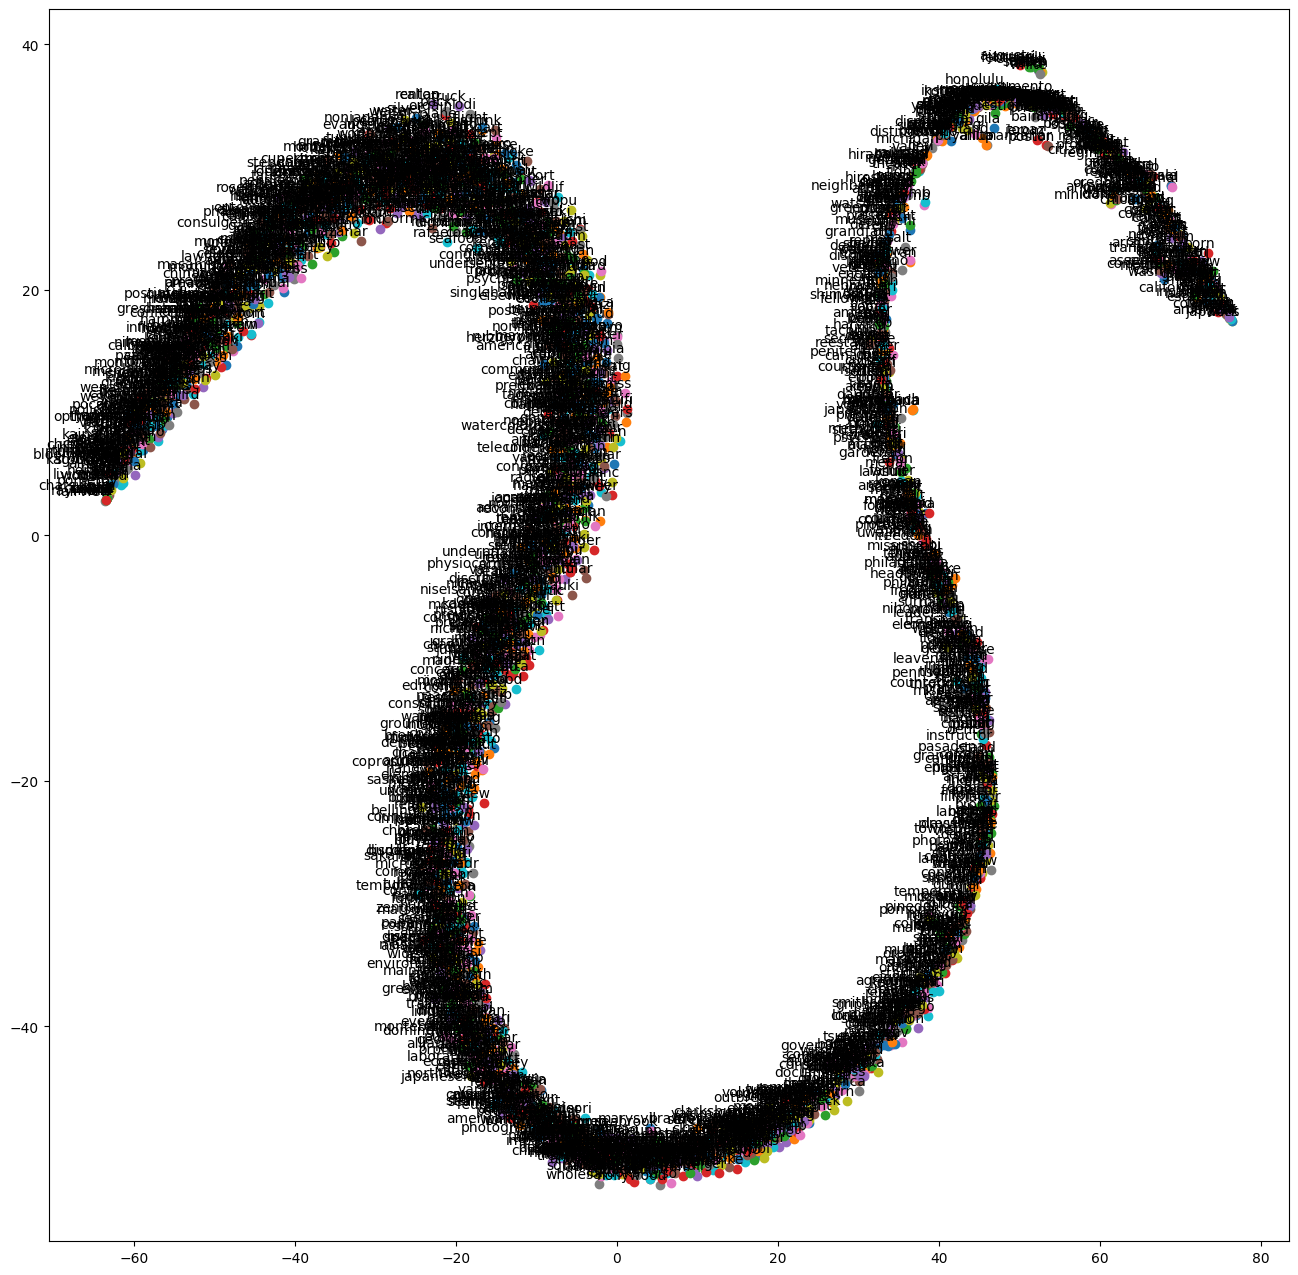

In [4]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Read data from the file
df = pd.read_csv('densho_cleaned.csv')

# Drop null values from 'Cleaned_Description' column
df.dropna(subset=['Cleaned_Description'], inplace=True)

# Extract 'Cleaned_Description' column
documents = df['Cleaned_Description'].tolist()

# Tokenize the text and perform preprocessing
data = [simple_preprocess(doc) for doc in documents]

# Train the Word2Vec model
model = Word2Vec(sentences=data, vector_size=300, window=5, min_count=1, workers=4)

# Get word embeddings and corresponding labels
labels = []
embeddings = []
for word in model.wv.index_to_key:
    embeddings.append(model.wv[word])
    labels.append(word)

# Convert embeddings and labels to numpy arrays
embeddings = np.array(embeddings)
labels = np.array(labels)

# Visualize the Word Embeddings using t-SNE
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(embeddings)

x = new_values[:, 0]
y = new_values[:, 1]

# Plot the word embeddings
plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i], y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [5]:
# The GitHub link of your final csv file


# Link: https://github.com/yashwanthjilla7/INFO-5731/blob/8314d488dfae6cbcd739ff43f4e7c52584279ae9/Final.CSV.File%20_Assignment_3.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [6]:
# Type your answer
'''
This tasks was really a deep look into natural language processing (NLP) techniques, demonstrating both their difficulties and their engagement aspects. In addition, the conversion of text from the natural language to the digital code format was quite problematic and needed a great deal of carefulness in order to conduct text preprocessing, frequency counting, and probabilistic calculation. More than that, the last taskI mentioned was not only a test of my memory but also a chance to sharpen my programming skills as I learnt to work with the complexities of algorithm implementation. Likewise, training and visualization of Word Embedding Models, including training of the Word2Vec model and plotting word embeddings, was a source of major obstacles which necessitated good data cleaning, building the model, and creating relevant visualization. Although it might seem a struggle to do so, the practical relevance provided by this task has certainly made the discovery of these procedures entertaining and complete. I have explored concepts such as the N-gram, and the word embeddings as well as the sentiment analysis which gave ample learning and practical experience. Also, the process of generating the sample sentiment analysis dataset, which involved including the creativity element, brought excitement, imagined and the realistic review texts together with their sentiment annotations programmatically. I think the given time of completion in general was quite sufficient. however, there are certainly some tasks that needed more time to get a clear view of the issue, and the details of the solution. Therefore, as I remember some of these places where the approach could be better described, then the time could be provided to them. Eventually, the task turned out to be enlightening for me, formulating the perception that the NL class is not a field confined to sectorization and possibilities but it is a complex area as well.
'''

'\nThis tasks was really a deep look into natural language processing (NLP) techniques, demonstrating both their difficulties and their engagement aspects. In addition, the conversion of text from the natural language to the digital code format was quite problematic and needed a great deal of carefulness in order to conduct text preprocessing, frequency counting, and probabilistic calculation. More than that, the last taskI mentioned was not only a test of my memory but also a chance to sharpen my programming skills as I learnt to work with the complexities of algorithm implementation. Likewise, training and visualization of Word Embedding Models, including training of the Word2Vec model and plotting word embeddings, was a source of major obstacles which necessitated good data cleaning, building the model, and creating relevant visualization. Although it might seem a struggle to do so, the practical relevance provided by this task has certainly made the discovery of these procedures en